### Notebook for static concept presence analysis

In [3]:
%load_ext autoreload
%autoreload 2

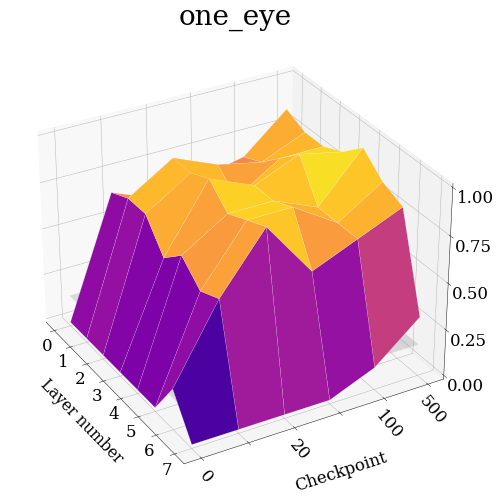

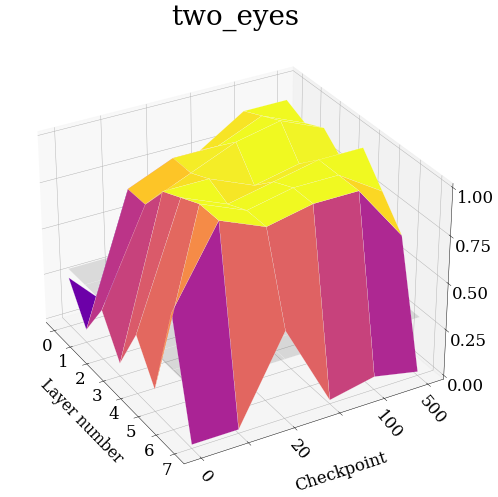

In [1]:
import os
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import json

sys.path.append(os.path.abspath(os.path.join(os.path.pardir, 'src')))

session_name = 'falcon'
board_name = '7x7'

levels = [0, 10, 20, 60, 100, 500]

resnet = True

model_type = "resnet" if resnet else "convnet"

#static_concepts = ['one_eye', 'two_eyes', 'area_advantage', 'tsumego', 'has_winning_move', 'capture_stones_threat', 'play_center_in_opening', 'win_on_pass', 'random']

static_concepts = ['one_eye', 'two_eyes']

for concept in static_concepts:
    # Input regression plot
    input_presences = None
    # Test if input presence file exists
    if os.path.exists(f"../concept_presences/static/{model_type}/{board_name}/{session_name}/{concept}/input"):
        for file in os.listdir(f"../concept_presences/static/{model_type}/{board_name}/{session_name}/{concept}/input"):
            with open(os.path.join(f"../concept_presences/static/{model_type}/{board_name}/{session_name}/{concept}/input", file)) as f:
                data = json.load(f)
                input_presences = data

    z = []

    for level in levels:
        presences = []
        for file in os.listdir(f"../concept_presences/static/{model_type}/{board_name}/{session_name}/{concept}/{level}"):
            with open(os.path.join(f"../concept_presences/static/{model_type}/{board_name}/{session_name}/{concept}/{level}", file)) as f:
                data = json.load(f)
                presences.append(data)
        
        y = []

        for (i, presence) in enumerate(presences):
            y = []
            for j, ind_presence in enumerate(presence):
                y.append(ind_presence)
            z.append(y)
    z = np.array(z)

    mpl.style.use("seaborn-v0_8-muted")
    mpl.rcParams['figure.figsize'] = (15, 15)
    mpl.rcParams['lines.linewidth'] = 10.0

    mpl.rcParams['font.family'] = "serif"
    mpl.rcParams["axes.axisbelow"] = True
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    # Scale down the figure size with setting the resolutionof the figure in dots-per-inch
    fig.set_dpi(40)

    # Create a subplot with the input presence as a surface
    if input_presences is not None:
        # Make data.
        X = np.arange(len(levels))
        Y = np.arange(z.shape[1])
        X, Y = np.meshgrid(Y, X)

        # Copy z array and replace all values with input presence
        input_presences = np.full((len(levels), z.shape[1]), input_presences)
        
        # Plot the surface.
        surf_1 = ax.plot_surface(X, Y, input_presences, color="gray", edgecolor="white", linewidth=0.25, vmin=0.1, vmax=0.9, alpha=0.2)


    # Make data.
    X = np.arange(len(levels))
    Y = np.arange(z.shape[1])
    X, Y = np.meshgrid(Y, X)

    # Plot the surface.
    surf_2 = ax.plot_surface(X, Y, z, cmap=cm.plasma, edgecolor="white", linewidth=0.25, vmin=0.1, vmax=0.9, alpha=1)

    # Customize the z axis.
    ax.set_zlim(0, 1.00)
    ax.set_axisbelow(False)
    ax.set_title(concept, fontsize=50, pad=-20)
    ax.set_xlabel("Layer number", labelpad=30, fontsize=28, zorder=10)
    ax.set_ylabel("Checkpoint", labelpad=45,fontsize=30,zorder=10)
    plt.xticks(fontsize=30, rotation=0)
    plt.xticks(np.arange(z.shape[1]))
    plt.yticks(fontsize=30, rotation=-50)
    ax.tick_params('z', labelsize=30, pad=15, reset=True)
    fig.patch.set_facecolor("white")

    ax.zaxis.set_major_locator(LinearLocator(5))

    labels = levels.copy()
    labels[0] = 0
    plt.yticks(np.arange(len(levels)), labels)
    yticks = ax.yaxis.get_major_ticks()
    for i in range(1, len(labels), 2):
        yticks[i].label1.set_visible(False)

    yticks[-1].label1.set_visible(True)
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')
    ax.view_init(30, -30)

    # Add legend to describe the surfaces
    #ax.legend([surf_1, surf_2], ["Input presence", "Concept presence"], loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2, fontsize=30)
        
    os.makedirs(f"plots/static/{model_type}/{board_name}/{session_name}", exist_ok=True)
    plt.savefig(f"plots/static/{model_type}/{board_name}/{session_name}/{concept}.png", transparent=False)